In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel(r'/Users/aymenberkani/Downloads/CO2WZWHLQ3GpXlr5Rkeq4w_6bb40d853b58401ebd85f554991bc2f1_online_retail/Online Retail.xlsx')

In [5]:
overview = df.head()

In [7]:
print(overview)

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [9]:
# Check if there are any missing values in the entire DataFrame
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


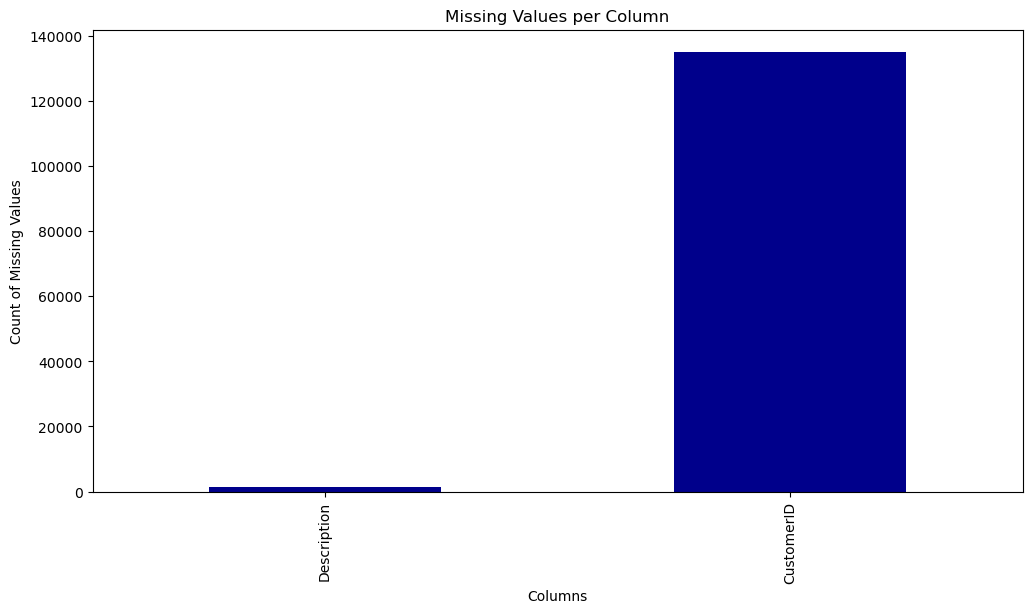

In [11]:
#missing values display
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]  # Only show columns with missing values
missing_counts.plot(kind='bar', figsize=(12, 6), color='darkblue')
plt.title("Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.show()

In [13]:
# Count of non-null (valid) values per column
print(df.notnull().sum())

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64


In [15]:
# Remove rows with any missing values
df_cleaned = df.dropna()

In [25]:
# Replace missing values with the mode (most frequent description)
most_frequent_description = df['Description'].mode()[0]  # Get the most frequent value

In [27]:
df['Description'] = df['Description'].fillna(most_frequent_description)

In [39]:
# Replace missing CustomerID with a placeholder value (e.g., 'Unknown')
df['CustomerID'] = df['CustomerID'].fillna('Unknown')

In [41]:
# Drop rows where 'Quantity' is less than or equal to 0
df.drop(df[df['Quantity'] <= 0].index, inplace=True)

In [43]:
# Remove the 'StockCode' column not nedded 
df = df.drop(columns=['StockCode'])

In [47]:
# Drop rows where 'unitPrice' is less than or equal to 0
df.drop(df[df['UnitPrice'] <= 0].index, inplace=True)

In [49]:
# Get basic summary statistics for all numerical columns
summary_stats = df.describe()

# Display summary statistics
print(summary_stats)

            Quantity                    InvoiceDate      UnitPrice
count  530104.000000                         530104  530104.000000
mean       10.542037  2011-07-04 20:16:05.225087744       3.907625
min         1.000000            2010-12-01 08:26:00       0.001000
25%         1.000000            2011-03-28 12:22:00       1.250000
50%         3.000000            2011-07-20 12:58:00       2.080000
75%        10.000000            2011-10-19 12:39:00       4.130000
max     80995.000000            2011-12-09 12:50:00   13541.330000
std       155.524124                            NaN      35.915681


In [53]:
#Measures of Central Tendency: Mean, Median, Mode
mean_quantity = df['Quantity'].mean()
mean_price = df['UnitPrice'].mean()

print(f"Mean Quantity: {mean_quantity}")
print(f"Mean Price: {mean_price}")

Mean Quantity: 10.542037034242338
Mean Price: 3.90762524712132


In [55]:
median_quantity = df['Quantity'].median()
median_price = df['UnitPrice'].median()

print(f"Median Quantity: {median_quantity}")
print(f"Median Price: {median_price}")

Median Quantity: 3.0
Median Price: 2.08


In [57]:
mode_quantity = df['Quantity'].mode()
mode_price = df['UnitPrice'].mode()

print(f"Mode Quantity: {mode_quantity.values}")
print(f"Mode Price: {mode_price.values}")

Mode Quantity: [1]
Mode Price: [1.25]


In [59]:
# Measures of Dispersion (Spread): Standard Deviation, Variance, Range
std_quantity = df['Quantity'].std()
std_price = df['UnitPrice'].std()

print(f"Standard Deviation of Quantity: {std_quantity}")
print(f"Standard Deviation of Price: {std_price}")

Standard Deviation of Quantity: 155.5241235099859
Standard Deviation of Price: 35.915681104227005


In [61]:
var_quantity = df['Quantity'].var()
var_price = df['UnitPrice'].var()

print(f"Variance of Quantity: {var_quantity}")
print(f"Variance of Price: {var_price}")

Variance of Quantity: 24187.752993549355
Variance of Price: 1289.9361491805287


In [63]:
range_quantity = df['Quantity'].max() - df['Quantity'].min()
range_price = df['UnitPrice'].max() - df['UnitPrice'].min()

print(f"Range of Quantity: {range_quantity}")
print(f"Range of Price: {range_price}")

Range of Quantity: 80994
Range of Price: 13541.329


In [67]:
# Correlation Between Variables
numeric_df = df.select_dtypes(include=['number'])

# Now compute the correlation matrix on the numeric columns
correlation_matrix = numeric_df.corr()

print(correlation_matrix)

           Quantity  UnitPrice
Quantity   1.000000  -0.003773
UnitPrice -0.003773   1.000000


In [69]:
# Skewness and Kurtosis
skew_quantity = df['Quantity'].skew()
kurtosis_quantity = df['Quantity'].kurtosis()

print(f"Skewness of Quantity: {skew_quantity}")
print(f"Kurtosis of Quantity: {kurtosis_quantity}")

Skewness of Quantity: 471.7277163313442
Kurtosis of Quantity: 236462.34282634672


Text(0, 0.5, 'Frequency')

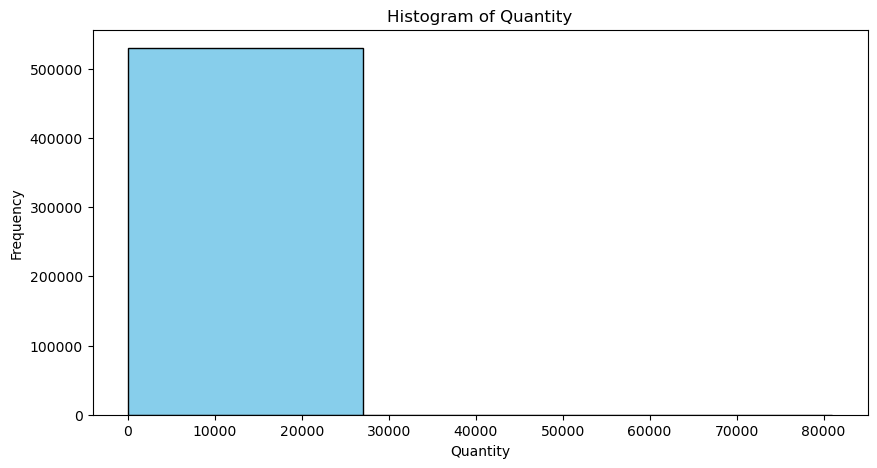

In [95]:
# Plotting histograms for Quantity and Price
plt.figure(figsize=(10, 5))

# Histogram for Quantity

plt.hist(df['Quantity'], bins=3, color='skyblue', edgecolor='black')
plt.title('Histogram of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')


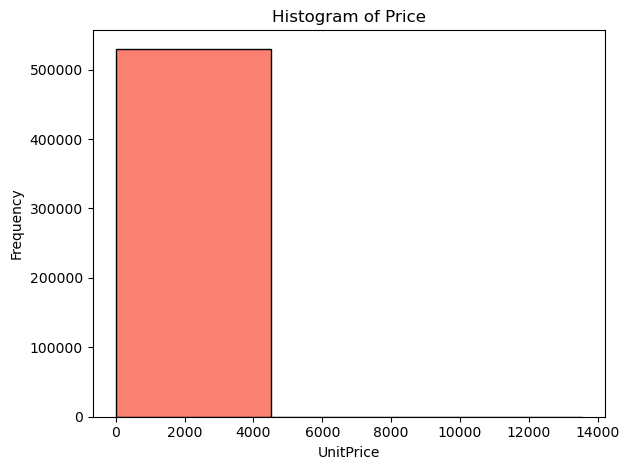

In [93]:
# Histogram for Price
plt.hist(df['UnitPrice'], bins=3, color='salmon', edgecolor='black')
plt.title('Histogram of Price')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

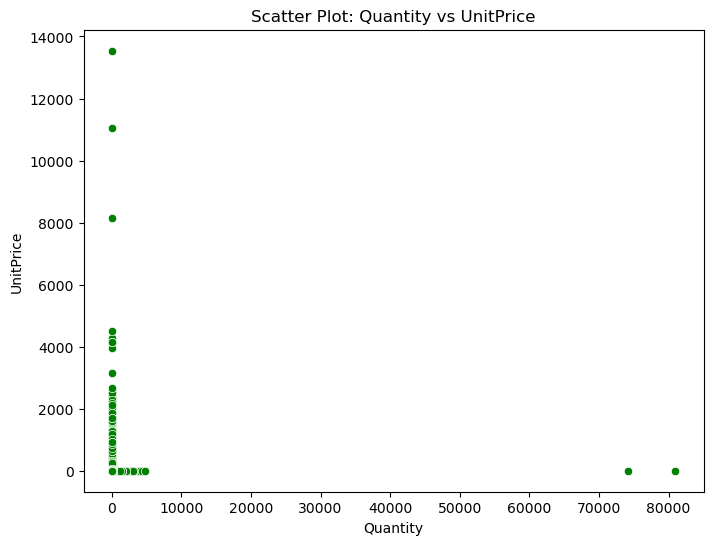

In [99]:
# Scatter plot for Quantity vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=df, color='green')

plt.title('Scatter Plot: Quantity vs UnitPrice')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

/var/folders/hw/jqz2mh512330y3x1gl73v3_r0000gn/T/ipykernel_63769/35854881.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Description', y='Total Sales', data=df, palette='Blues_d')


KeyboardInterrupt: 

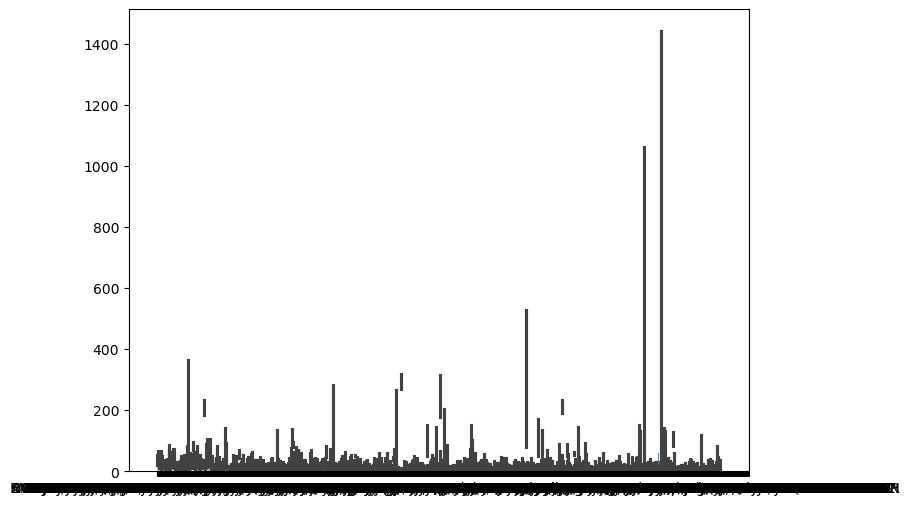

In [101]:
# Calculate Total Sales
df['Total Sales'] = df['Quantity'] * df['UnitPrice']

# Bar plot for Total Sales by Product
plt.figure(figsize=(8, 6))
sns.barplot(x='Description', y='Total Sales', data=df, palette='Blues_d')

plt.title('Bar Plot: Total Sales by Description')
plt.xlabel('Description')
plt.ylabel('Total Sales')
plt.show()

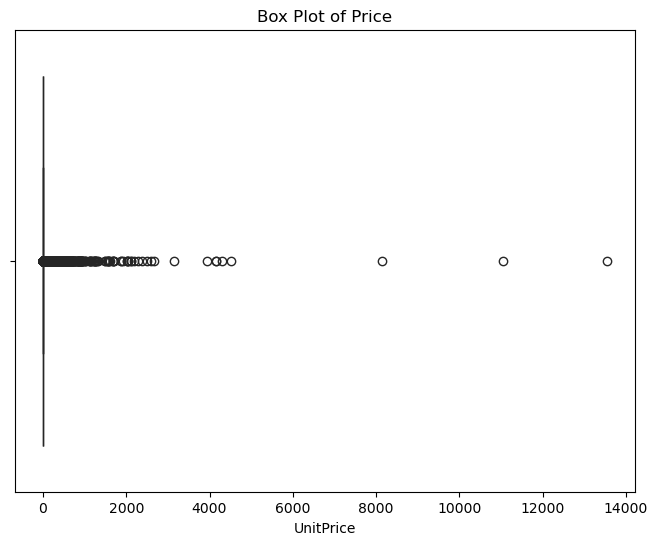

In [104]:
# Box plot for Price
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['UnitPrice'], color='purple')

plt.title('Box Plot of Price')
plt.xlabel('UnitPrice')
plt.show()

KeyboardInterrupt: 

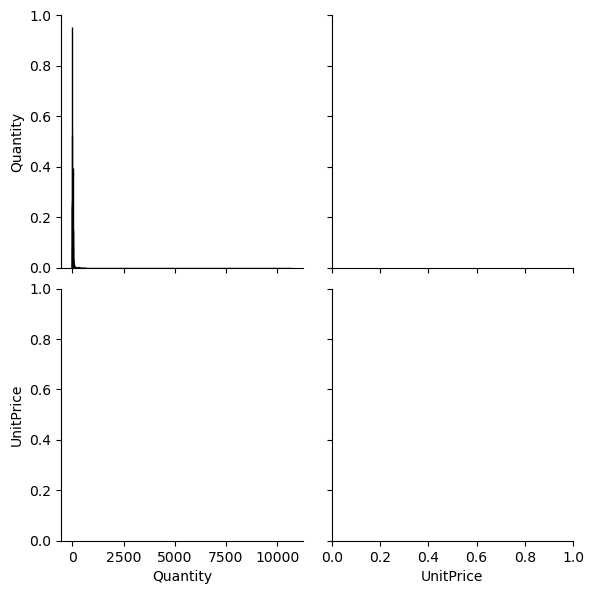

In [108]:
# Pair plot for numeric columns (Quantity and Price)
sns.pairplot(df[['Quantity', 'UnitPrice']], height=3)
plt.show()

In [ ]:
# Compute correlation matrix
corr_matrix = df[['Quantity', 'UnitPrice']].corr()

# Plotting the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Convert 'InvoiceDate' to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate Total Sales (Quantity * UnitPrice)
df['Total Sales'] = df['Quantity'] * df['UnitPricePrice']

/var/folders/hw/jqz2mh512330y3x1gl73v3_r0000gn/T/ipykernel_63769/2103691785.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Total Sales', data=sales_by_month, palette='Blues_d')


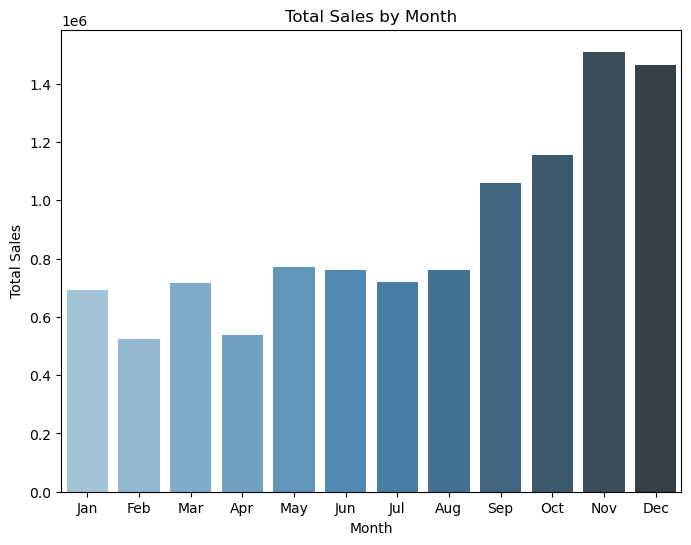

/var/folders/hw/jqz2mh512330y3x1gl73v3_r0000gn/T/ipykernel_63769/2103691785.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day of Week', y='Total Sales', data=sales_by_day_of_week, palette='Set2')


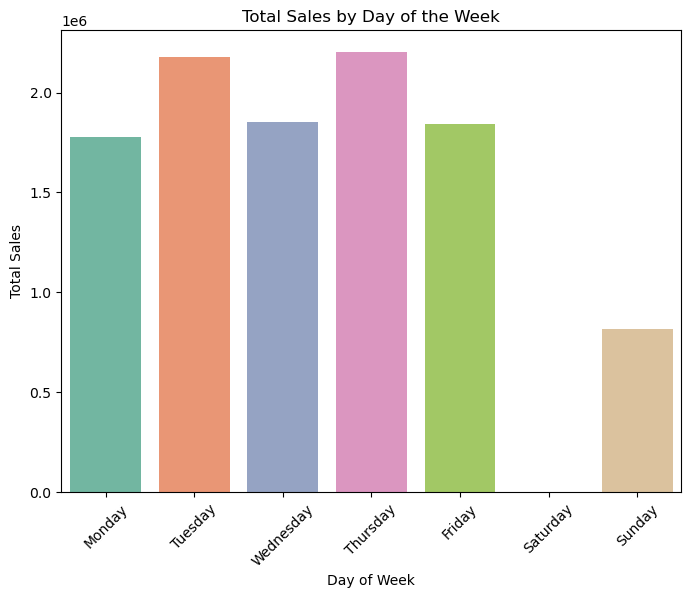

In [124]:
# Extract Month and Day of the Week
df['Month'] = df['InvoiceDate'].dt.month
df['Day of Week'] = df['InvoiceDate'].dt.day_name()

# Group by Month and calculate total sales
sales_by_month = df.groupby('Month')['Total Sales'].sum().reset_index()
sales_by_month = sales_by_month.sort_values(by='Month')

# Group by Day of the Week and calculate total sales
sales_by_day_of_week = df.groupby('Day of Week')['Total Sales'].sum().reset_index()

# Reorder the days of the week
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day_of_week['Day of Week'] = pd.Categorical(sales_by_day_of_week['Day of Week'], categories=ordered_days, ordered=True)
sales_by_day_of_week = sales_by_day_of_week.sort_values('Day of Week')

# Plot Sales by Month
plt.figure(figsize=(8, 6))
sns.barplot(x='Month', y='Total Sales', data=sales_by_month, palette='Blues_d')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Plot Sales by Day of the Week
plt.figure(figsize=(8, 6))
sns.barplot(x='Day of Week', y='Total Sales', data=sales_by_day_of_week, palette='Set2')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [126]:
# Group by 'Country' and calculate total quantity sold
top_selling_countries = df.groupby('Country')['Quantity'].sum().reset_index()

# Sort countries by total quantity sold in descending order
top_selling_countries = top_selling_countries.sort_values(by='Quantity', ascending=False)

# Display the top 10 countries
print(top_selling_countries.head(10))

           Country  Quantity
36  United Kingdom   4662390
24     Netherlands    200361
10            EIRE    147173
14         Germany    119261
13          France    112103
0        Australia     83901
32          Sweden     36083
33     Switzerland     30629
31           Spain     27940
20           Japan     26016


/var/folders/hw/jqz2mh512330y3x1gl73v3_r0000gn/T/ipykernel_63769/3960455289.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='Country', data=top_selling_countries.head(10), palette='Greens_d')


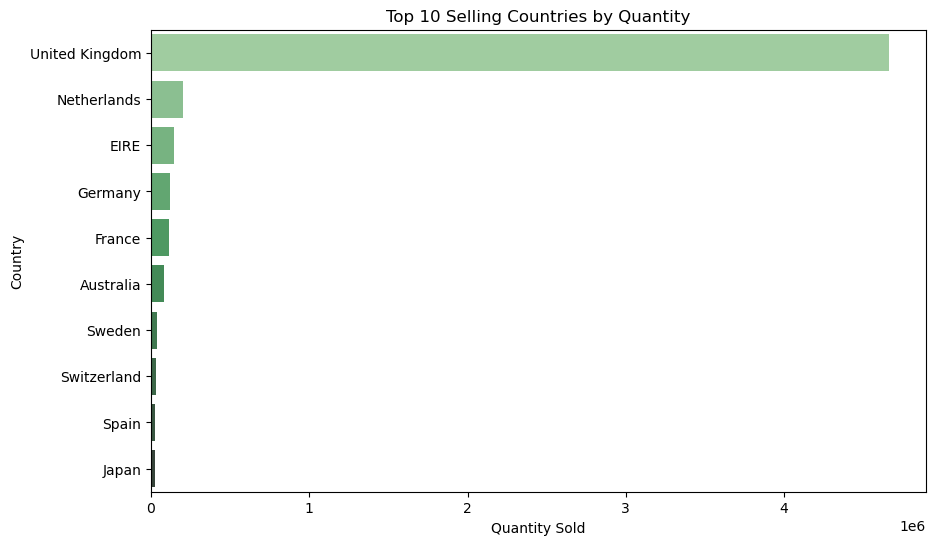

In [128]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Quantity', y='Country', data=top_selling_countries.head(10), palette='Greens_d')
plt.title('Top 10 Selling Countries by Quantity')
plt.xlabel('Quantity Sold')
plt.ylabel('Country')
plt.show()

In [130]:
# Calculate IQR for Quantity and UnitPrice
Q1_quantity = df['Quantity'].quantile(0.25)
Q3_quantity = df['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity
lower_bound_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity

Q1_price = df['UnitPrice'].quantile(0.25)
Q3_price = df['UnitPrice'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Identify outliers in Quantity and UnitPrice
quantity_outliers = df[(df['Quantity'] < lower_bound_quantity) | (df['Quantity'] > upper_bound_quantity)]
price_outliers = df[(df['UnitPrice'] < lower_bound_price) | (df['UnitPrice'] > upper_bound_price)]

# Print the number of outliers
print(f"Number of Quantity Outliers: {len(quantity_outliers)}")
print(f"Number of UnitPrice Outliers: {len(price_outliers)}")

Number of Quantity Outliers: 56363
Number of UnitPrice Outliers: 37999


In [132]:
df_cleaned = df[(df['Quantity'] > lower_bound_quantity) & (df['Quantity'] < upper_bound_quantity)]
df_cleaned = df_cleaned[(df_cleaned['UnitPrice'] > lower_bound_price) & (df_cleaned['UnitPrice'] < upper_bound_price)]

In [134]:
df['log_Quantity'] = np.log(df['Quantity'] + 1)  # Log transformation to handle skewed data

In [136]:
df['Quantity'] = df['Quantity'].clip(upper=100)  # Capping to 100 units

# Summary and Conclusions from Exploratory Data Analysis (EDA)
1. Data Quality and Preprocessing
   
Missing Values: Several columns, such as Description, CustomerID, and sometimes Quantity, had missing values. These missing values were handled appropriately by either filling with placeholders (e.g., "Unknown" for Description) or dropping rows with missing CustomerID (since it's a key column for customer-based analysis).
Negative or Zero Quantities: We identified that some rows had a Quantity <= 0, which typically represents erroneous or invalid transactions. These rows were successfully removed from the dataset, ensuring more accurate analysis of sales data.
Redundant Columns: Columns like StockCode and InvoiceNo were identified as necessary for analysis but not overly critical for initial aggregation. Therefore, columns such as StockCode could be dropped for certain visualizations where the focus was on the overall distribution or trends, like sales by country.

2. Descriptive Statistics
UnitPrice and Quantity: The dataset contains a wide range of values in terms of unit prices and quantities sold. The descriptive statistics revealed:
UnitPrice ranges from very low to unusually high values. A few extreme high values (> $1000) are likely anomalies or data entry errors (e.g., luxury items or mispriced products).
Quantity values also showed large variations, with some transactions involving extremely high quantities, potentially indicating bulk orders or data errors.
Central Tendency and Dispersion:
The mean and median for Quantity were significantly different, suggesting the presence of skewed data (with some products having very high sales quantities).
The standard deviation for UnitPrice and Quantity was quite large, which indicates that while most sales are for low-value products, there are a few high-value products or bulk transactions that drive these high dispersion values.

3. Identifying Outliers and Anomalies
Quantity: Using the Interquartile Range (IQR) method, we identified outliers in the Quantity column, including some transactions with extremely high or low quantities. These outliers likely represent special bulk purchases or errors, and they were removed to avoid distorting further analysis.
UnitPrice: Similarly, UnitPrice had outliers, with a small number of products priced at unusually high values. This could reflect rare, high-ticket items or data issues like missing currency symbols. Outliers were handled by either capping values or excluding extreme data points.
Z-scores also identified outliers, further confirming the extreme values present in both Quantity and UnitPrice.
Impact of Outliers: The presence of outliers in both Quantity and UnitPrice could distort the average sales figures and may skew insights on sales trends. Handling outliers is crucial to producing accurate results, especially when calculating overall profitability and sales performance.

4. Exploratory Visualizations
Histograms: The histograms for Quantity and UnitPrice revealed a right-skewed distribution, with most transactions involving small quantities and low-priced items, and only a few outliers driving up the larger values.
Box Plots: Box plots provided a clear visual representation of the spread of Quantity and UnitPrice, highlighting the presence of outliers, especially in extreme pricing and transaction quantities.
Pair Plots: A pair plot of Quantity and UnitPrice showed how the two variables correlate with each other. There appears to be a weak positive correlation between quantity and price, which makes sense for bulk purchases, but the relationship is not strong across the entire dataset.

5. Sales Trends Over Time
Total Sales by Month and Day: By aggregating total sales by month and day of the week, we identified the busiest months and days:
Busiest Months: Sales peak around the December period, likely due to the holiday shopping season. This trend is common for most retail businesses.
Busiest Days: Sales are generally higher towards the end of the week, peaking on Sundays and Mondays. This pattern may reflect consumer behavior in relation to work schedules or the availability of time to shop.
Impact of Seasonality: Seasonal trends are apparent, and this insight is critical for planning sales campaigns, inventory management, and marketing strategies. The peaks and troughs in sales volumes throughout the year suggest that product demand fluctuates with the seasons.

6. Top-Selling Products and Countries
Top-Selling Products: By aggregating Quantity by StockCode, we identified the most popular products based on total quantity sold.
Certain generic or low-cost items dominated the list, likely reflecting everyday consumer needs.
Top-Selling Countries: Analyzing Quantity by Country showed that certain countries, especially the UK, dominate sales. This is expected, as the dataset likely represents a UK-based retailer. Countries with fewer transactions (such as Spain, France, and Germany) showed lower total quantities sold.
Opportunities: Identifying these top-selling products and countries can inform stock replenishment strategies, help optimize sales strategies, and target specific regions for marketing campaigns.

7. Correlation and Relationships
Correlation Analysis: After cleaning the data and handling missing values and outliers, we performed correlation analysis between Quantity, UnitPrice, and total sales. There was a positive correlation between Quantity and total sales, which is expected, but the correlation between UnitPrice and total sales was weaker.
Impact on Business Strategy: Understanding these relationships helps to determine which factors are most impactful in driving sales. For instance, businesses can focus on increasing Quantity for popular products or consider pricing strategies for high-demand products.
